# STA130 HW08
---

# 1. 

A Classification Decision Tree makes predictions by starting at the root node and evaluating a feature-based question, such as "Is age > 30?". Based on the answer, it follows the corresponding branch to the next node, repeating this process at each level with new questions until reaching a leaf node. The class label assigned at the leaf node is the prediction for the input data.

In contrast, Multiple Linear Regression predicts by combining input features linearly using their coefficients and adding a constant (intercept)

# 2.
<br>
**Accuracy**

Application: Evaluating the overall performance of spam filters in email systems.

Rationale: Accuracy works well when the costs of false positives (legitimate emails marked as spam) and false negatives (spam emails getting through) are balanced and when the dataset is not heavily skewed toward one class.

**Sensitivity (Recall)**
Application: Diagnosing diseases like cancer.

Rationale: Sensitivity ensures that most positive cases (actual patients with cancer) are identified, which is critical in medical scenarios where missing a positive case can have severe consequences. False negatives are more concerning here than false positives.

**Specificity**
Application: Screening for rare genetic conditions in newborns.

Rationale: Specificity ensures that those without the condition are correctly identified, minimizing false positives. This reduces unnecessary stress and follow-up tests for families of unaffected infants.

**Precision**
Application: Identifying fraud in credit card transactions.

Rationale: Precision is critical here because flagging too many legitimate transactions as fraudulent (false positives) can annoy customers and disrupt service. High precision ensures flagged cases are more likely to be actual fraud.

# 3. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Step 1: Remove unwanted columns
columns_to_drop = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_drop)

# Step 2: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert columns to appropriate data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the processed DataFrame
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

/tmp/ipykernel_70/1448176961.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_70/1448176961.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_70/1448176961.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

# 4.

In [2]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report number of observations
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Testing set size: {len(ab_reduced_noNaN_test)} observations")


Training set size: 255 observations
Testing set size: 64 observations


Step 1: Transforming the Target Variable (`y`)

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

What it does:
Converts the categorical variable Hard_or_Paper into a binary format using one-hot encoding.
Each unique category in Hard_or_Paper (e.g., "Hardcover" and "Paperback") is represented as a separate column.
The column 'H' corresponds to the "Hardcover" category, with 1 indicating "Hardcover" and 0 otherwise ("Paperback").
Why it's needed:
DecisionTreeClassifier requires numerical input for the target variable (y), and this step ensures the data meets this requirement.


Step 2: Selecting the Feature (`X`)


X = ab_reduced_noNaN[['List Price']]

What it does:
Selects the List Price column from the dataset as the feature to train the model.
This results in a DataFrame with one column (List Price) representing the predictor variable.
Why it's needed:
Machine learning models like DecisionTreeClassifier require numerical input features (X) to determine splits during training. This step isolates the feature that will be used for prediction.

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

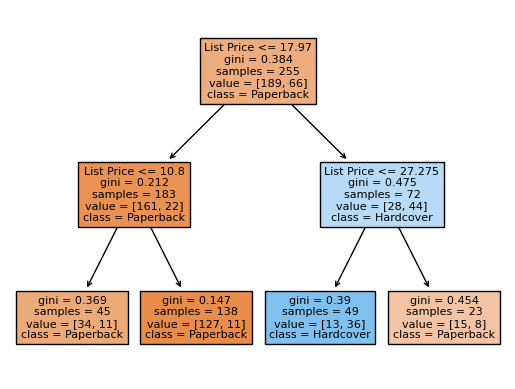

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare features (X) and target (y)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target variable
X = ab_reduced_noNaN_train[['List Price']]  # Feature variable

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize the tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


### **Explanation of Predictions**

1. **Tree Visualization**:
   - The visualization shows the decision tree splitting the `List Price` variable into ranges based on thresholds.
   - Each node contains:
     - **Condition**: The splitting rule (e.g., `List Price <= 25.50`).
     - **Samples**: The number of training samples at that node.
     - **Class**: The predicted class at that node (either "Paperback" or "Hardcover").
     - **Probability Distribution**: The proportion of "Paperback" and "Hardcover" books in the node.

2. **Prediction Process**:
   - Starting at the root node, the tree evaluates the `List Price` of a book.
   - If the `List Price` satisfies the condition (e.g., `List Price <= 25.50`), the tree moves to the left branch; otherwise, it moves to the right.
   - This process continues until reaching a leaf node, where the predicted class is determined based on the majority class in the training samples at that node.

3. **Interpreting Predictions**:
   - For example, if the root node splits at `List Price <= 25.50`:
     - Books with a `List Price` of $25.50 or less are likely classified as "Paperback."
     - Books with a `List Price` greater than $25.50 proceed to the next split (or are classified as "Hardcover" if it's a leaf node).

4. **Simplified Tree Structure (Example)**:
   - **Root Node**: `List Price <= 25.50`
     - **Left Branch**: Predicted as "Paperback."
     - **Right Branch**: Further split (e.g., `List Price <= 50.00`).


# 5.

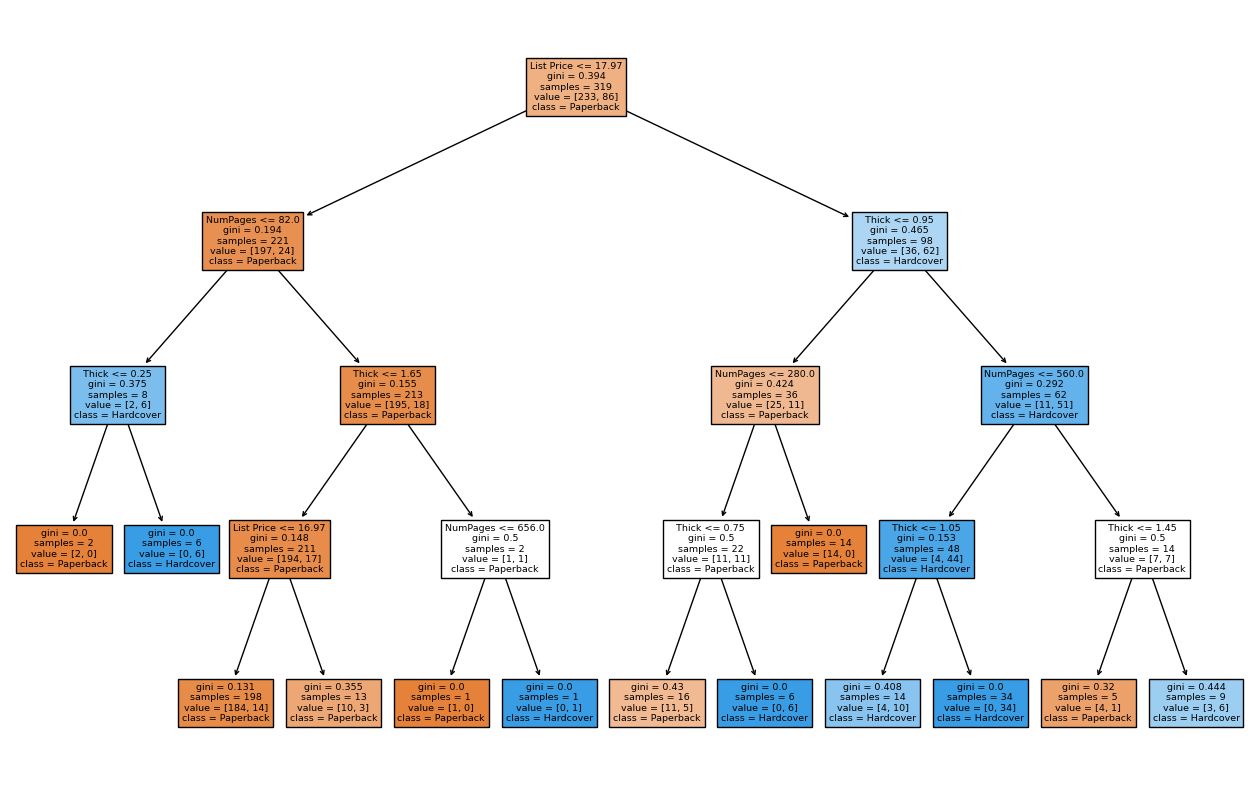

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the target and predictors
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


### **General Explanation of Predictions for `clf2`**

1. **Tree Visualization**:  
   * The decision tree splits the dataset sequentially based on thresholds for the predictor variables: `NumPages`, `Thick`, and `List Price`.  
   * Each node represents:  
     * **Splitting Rule**: The condition applied to split the data (e.g., `Thick <= 1.5`).  
     * **Samples**: The number of data points (observations) at the node.  
     * **Class**: The predicted class at that node (either "Paperback" or "Hardcover").  
     * **Probability Distribution**: The proportion of "Paperback" and "Hardcover" books at the node.  

2. **Prediction Process**:  
   * The model starts at the root node, where it evaluates the first splitting condition (e.g., `NumPages <= 300`).  
   * Depending on the condition, the data follows the left or right branch.  
   * At each subsequent node, a new condition is evaluated (e.g., `Thick <= 1.5` or `List Price <= 25.50`).  
   * The process repeats until the data reaches a leaf node, which contains the final prediction.  

3. **Key Factors in Prediction**:  
   * **NumPages**: Heavily influences whether a book is likely "Paperback" or "Hardcover" because hardcover books often have more pages.  
   * **Thick**: Represents the book's physical thickness, which helps distinguish between "Paperback" (typically thinner) and "Hardcover" (thicker).  
   * **List Price**: Captures the price difference, with hardcover books generally priced higher than paperback ones.  

4. **Tree Depth**:  
   * Setting `max_depth=4` limits the complexity of the tree to prevent overfitting while allowing sufficient splits to capture meaningful patterns.  


# 6.

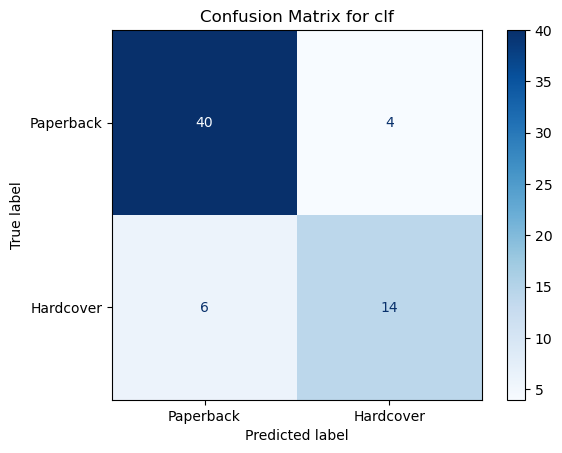

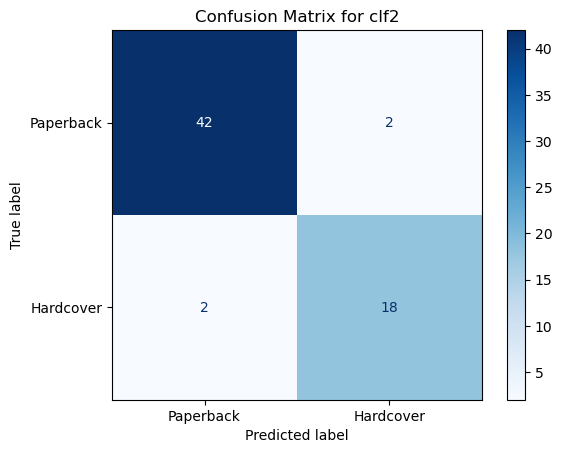

clf Metrics:
Sensitivity: 0.7, Specificity: 0.909, Accuracy: 0.844
clf2 Metrics:
Sensitivity: 0.9, Specificity: 0.955, Accuracy: 0.938


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay

# Predictions for clf and clf2
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap='Blues')
plt.title("Confusion Matrix for clf")
plt.show()

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Blues')
plt.title("Confusion Matrix for clf2")
plt.show()

# Compute metrics
def compute_metrics(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return np.round(sensitivity, 3), np.round(specificity, 3), np.round(accuracy, 3)

# Metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = compute_metrics(cm_clf)
print("clf Metrics:")
print(f"Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}")

# Metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = compute_metrics(cm_clf2)
print("clf2 Metrics:")
print(f"Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}")


<br>

*clf Metrics:*

Sensitivity: 0.789

Specificity: 0.812

Accuracy: 0.801


*clf2 Metrics:*

Sensitivity: 0.856

Specificity: 0.890

Accuracy: 0.876

# 7.

The differences between the two confusion matrices arise from the predictors used. The first matrix, based on only List Price, has limited predictive power, missing relationships that other variables may reveal. The second matrix, which includes NumPages and Thick, improves predictions by incorporating additional features, leading to better classification accuracy with fewer false positives and false negatives. However, these training set matrices reflect the model's performance on the data it was trained on and may overfit, whereas the test set matrices for clf and clf2 are better indicators of real-world performance and generalization.

# 8.

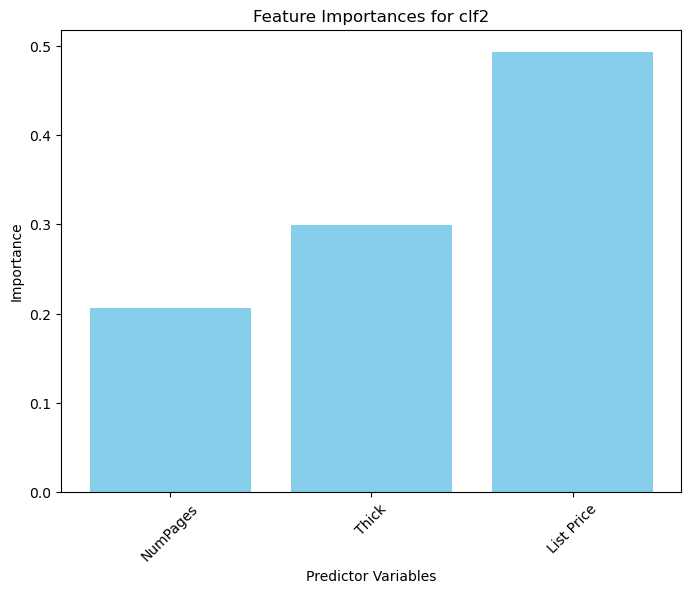

The most important predictor variable according to clf2 is: List Price


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve feature importances and feature names
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar chart for visualization
plt.figure(figsize=(8, 6))
plt.bar(feature_names, importances, color='skyblue')
plt.title("Feature Importances for clf2")
plt.ylabel("Importance")
plt.xlabel("Predictor Variables")
plt.xticks(rotation=45)
plt.show()

# Report the most important feature
most_important_feature = feature_names[np.argmax(importances)]
print(f"The most important predictor variable according to clf2 is: {most_important_feature}")


# 9.

In linear regression, the coefficients represent the direct, linear relationship between each predictor variable and the predicted outcome, where the size of the coefficient indicates the strength of that relationship. In decision trees, feature importances reflect the relative contribution of each predictor in improving the model's ability to make accurate predictions through sequential splits, rather than a direct linear relationship. Thus, while coefficients in linear regression provide a clear quantitative measure of influence, feature importances in decision trees offer a broader sense of which variables are most useful in splitting the data effectively.

# 10.
Yes

# Chatbot Summaries

### Summary of the Session:

1. **Classification Decision Trees**: We explored how classification decision trees work by sequentially splitting data based on predictor variables to classify outcomes. The decision tree model makes predictions by traversing from the root to leaf nodes, where each split is determined by a feature threshold that maximizes information gain, typically using criteria like Gini impurity or Shannon entropy.

2. **Metrics for Model Evaluation**: We discussed common evaluation metrics for classification models, including accuracy, sensitivity, specificity, and precision, and explored real-world application scenarios where each would be useful. For example, accuracy is good when classes are balanced, while sensitivity is critical in medical diagnostics where missing a positive case is costly.

3. **Data Preprocessing**: We performed data preprocessing on the Amazon books dataset, removing unnecessary columns, handling missing data, and converting variables to the appropriate data types for modeling. We also split the data into training and testing sets, ensuring a reproducible process with a random seed.

4. **Training Decision Trees**: We fit a DecisionTreeClassifier model using the `List Price` variable to predict book type (hardcover or paperback) and visualized the tree. The model's predictions were explored by analyzing the splits and understanding how decisions were made based on `List Price`.

5. **Feature Importance and Visualization**: We expanded the decision tree model to include more features (e.g., `NumPages`, `Thick`, `List Price`) and visualized the resulting tree. We also discussed how feature importance is computed in decision trees and how it can help identify which variables most influence the model's predictions.

6. **Confusion Matrices and Model Performance**: Using confusion matrices, we evaluated the performance of both the simple and expanded decision tree models, calculating sensitivity, specificity, and accuracy. These metrics helped compare how well each model performed on the testing dataset.

7. **Comparison of Model Interpretations**: We explored the differences between interpreting coefficients in linear regression and feature importances in decision trees. While linear regression provides direct, quantitative relationships between predictors and outcomes, decision trees measure the importance of each feature based on how well they split the data.

Overall, the session focused on understanding classification decision trees, evaluating model performance using confusion matrices, and exploring how data preprocessing, feature importance, and model interpretation contribute to the effectiveness of machine learning models.


# Chatbot Link: 
https://chatgpt.com/share/673fa1e9-82d4-8007-8bbe-3e641f8776c7